# Iris dataset (Clustering)

## Authors

Written by: Neeraj Asthana (under Professor Robert Brunner)

University of Illinois at Urbana-Champaign

Summer 2016

## Acknowledgements

Dataset found on UCI Machine Learning repository at: https://archive.ics.uci.edu/ml/datasets/Iris

## Dataset Information

This data set tries to cluster iris species using 4 different continous predcitors.

A description of the dataset can be found at: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

Predictors:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### Imports

In [1]:
#Libraries and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

### Reading Data

In [2]:
#Names of all of the columns
names = [
       'sep_length'
    ,  'sep_width'
    ,  'petal_length'
    ,  'petal_width'
    ,  'species'
]

#Import dataset
data = pd.read_csv('iris.data', sep = ',', header = None, names = names)

data.head(10)

,sep_length,sep_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.shape

(150, 5)

### Separate Data

In [5]:
#Select Predictor columns
X = data.ix[:,:-1]

#Scale X so that all columns have the same mean and variance
X_scaled = preprocessing.scale(X)

#Select target column
y = data['species']

y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

### Scatter Plot Matrix

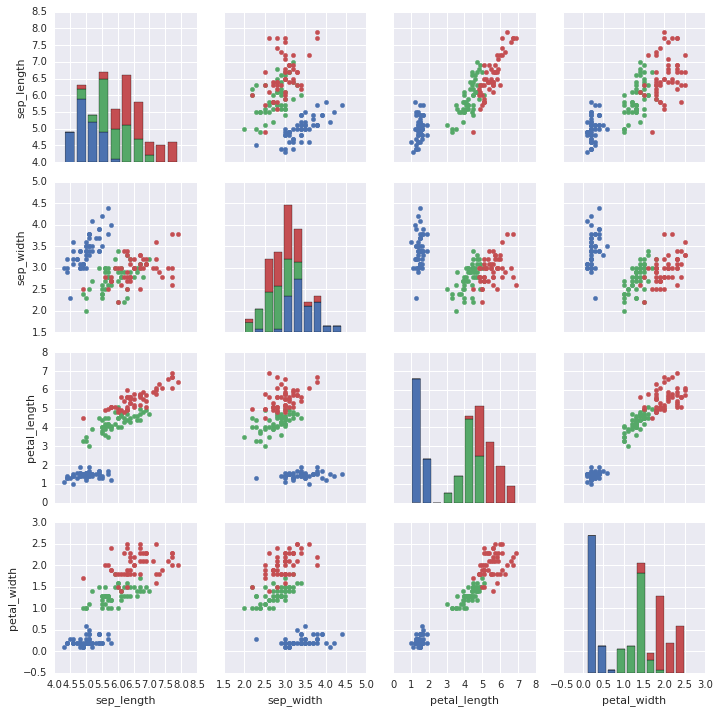

In [6]:
# Visualize dataset with scatterplot matrix
%matplotlib inline

g = sns.PairGrid(data, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### K Means (3 clusters)

In [25]:
#train a k-nearest neighbor algorithm
fit = KMeans(n_clusters=3).fit(X_scaled)
fit.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [29]:
#remake labels so that they properly matchup with the classes 
labels = fit.labels_[:]
for index,val in enumerate(labels):
    if val == 1:
        labels[index] = 1
    elif val == 2:
        labels[index] = 3
    else:
        labels[index] = 2

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2], dtype=int32)

In [30]:
conf_mat = np.zeros((3,3))

true = np.array([0]*50 + [1]*50 + [2]*50)

for i,val in enumerate(true):
    conf_mat[val,labels[i]-1] += 1

#true vs. predicted
print(pd.DataFrame(conf_mat))

      0     1     2
0  50.0   0.0   0.0
1   0.0  39.0  11.0
2   0.0  14.0  36.0


## Data Tasks

1. Read in file
    - Different types of separators (',',' ', '\t', '\s', etc.)
    - Specify whether there is a header or not
    - Name different columns
    - Editting values to matchup with columns

1. Select columns for the regression tasks
    - Select columns I want to use as predictors
    - Select which column I am looking to target and predict

1. Transform columns or variables
    - scaling columns so that their means and variances are equal
    
1. Cluster using K-Means
    - specify number of clusters
    - specify initial cluster locations
    - clustering type (avg, max, min, etc.)

1. Perform diagnostics on the model
    - See cluster centers
    - confusion matrix
    
1. Edit columns of labels to match up with species names
    
1. Visualizations
    - Visualize dataset as a whole (scatter plot matrix)
    - See diagnostic plots (t-squared, ccc)